In [1]:
def save_notebook():
    return display(Javascript("IPython.notebook.save_notebook()"),
                   include=['application/javascript'])

def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [2]:
import sys, os
import glob
import warnings
sys.path.append('../')

from rankutils.evaluation import comp_precision, comp_recall, interp_prec_recall_curve

from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set()

from tqdm import tqdm_notebook as tqdm
from tqdm import tnrange

In [3]:
def eval_elp_precision_recall(labels, k):

    elp_rec = np.arange(0.0, 1.1, 0.1)
    elp_prec_all = []
    ap_all = np.zeros(labels.shape[0], dtype=np.float64)

    for i, row in enumerate(labels):
        
        y_true = row[0:k]
        
        if y_true.sum() > 0:

            prec = comp_precision(y_true)
            rec = comp_recall(y_true)

            elp_prec_all.append(interp_prec_recall_curve(prec, rec, points=elp_rec))

            ap_all[i] = average_precision_score(y_true, np.arange(y_true.size, 0, -1))
        else:
            aux = np.zeros(11, dtype=np.float64)
            aux[0] = 1.0
            elp_prec_all.append(aux)

    elp_prec_all = np.vstack(elp_prec_all)

    mean_elp_prec = np.mean(elp_prec_all, axis=0)
    
    return mean_elp_prec, np.mean(ap_all)

In [4]:
topk = 30
collection = 'places365'
labeldir = '/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-labels/2x5-fold/{0:s}/'.format(collection)
labelpaths = glob.glob(labeldir + "*.npy")
labelpaths.sort()

np.set_printoptions(precision=3, suppress=True)

In [5]:
namelist = []
mean_elp_prec_list = []

for path in tqdm(labelpaths, desc="Evaluating: ", total=len(labelpaths)):
    
    mean_elp_prec, mAP = eval_elp_precision_recall(np.load(path), topk)
    mean_elp_prec_list.append(mean_elp_prec)
    
    aux = os.path.basename(path).split('_', 1)[0]
    namelist.append("{0:40s} : mAP = {1:0.3f}".format(aux, mAP))

places365.001.vgg16-L2sq.irp             : mAP = 0.652
places365.002.resnet152-L2sq.irp         : mAP = 0.659
places365.003.vgg16-Cos.irp              : mAP = 0.671
places365.004.vgg16-Cheby.irp            : mAP = 0.655
places365.005.vgg16-Canb.irp             : mAP = 0.658


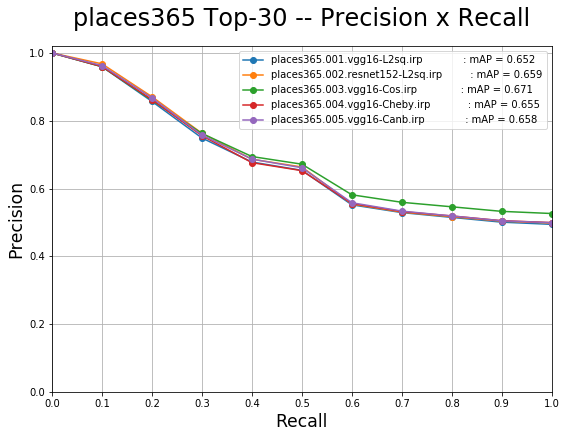

In [6]:
for n in namelist:
    print(n)

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

x = np.arange(0.0, 1.1, 0.1)
for i in range(len(namelist)):
    y = mean_elp_prec_list[i]
    l = namelist[i]
    
    ax.plot(x, y, '-o', label="{0:50s}".format(l))

ax.set_xlim(0.0, 1.0)
ax.set_xlabel('Recall', **dict(fontsize='xx-large'))
ax.set_xticks(np.arange(0.0, 1.1, 0.1))

ax.set_ylim(0.0, 1.02)
ax.set_ylabel('Precision', **dict(fontsize='xx-large'))

ax.grid(which='both', axis='both')

ax.set_title('{0:s} Top-{1:d} -- Precision x Recall'.format(collection, topk), **dict(fontsize=24), pad=20)

_ = ax.legend()

plt.subplots_adjust(left=0.1, top=0.9, bottom=0.1)
plt.savefig('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./{0:s}_top{1:d}_PxR.svg'.format(collection, topk))

In [7]:
collection = 'vggfaces'
labeldir = '/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-labels/2x5-fold/{0:s}/'.format(collection)
labelpaths = glob.glob(labeldir + "*.npy")
labelpaths.sort()

In [8]:
namelist = []
mean_elp_prec_list = []

for path in tqdm(labelpaths, desc="Evaluating: ", total=len(labelpaths)):
    
    mean_elp_prec, mAP = eval_elp_precision_recall(np.load(path), topk)
    mean_elp_prec_list.append(mean_elp_prec)
    
    aux = os.path.basename(path).split('_', 1)[0]
    namelist.append("{0:40s} : mAP = {1:0.3f}".format(aux, mAP))

vggfaces.001.vgg16-L2sq.irp              : mAP = 0.977
vggfaces.002.vgg16-pert-L2sq.irp         : mAP = 0.715
vggfaces.003.vgg16-Cos.irp               : mAP = 0.981
vggfaces.004.vgg16-Cheby.irp             : mAP = 0.978
vggfaces.005.vgg16-Canb.irp              : mAP = 0.978


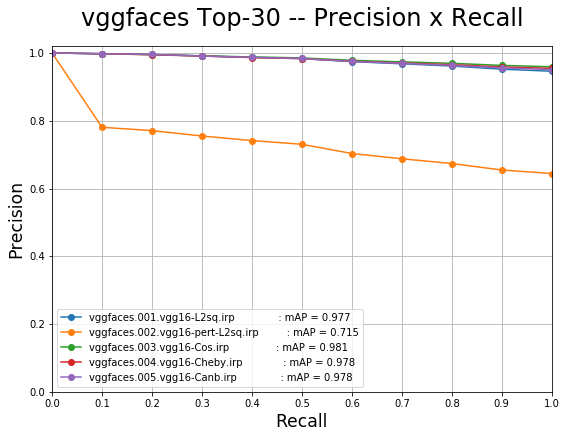

In [9]:
for n in namelist:
    print(n)

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
fig.tight_layout()

x = np.arange(0.0, 1.1, 0.1)
for i in range(len(namelist)):
    y = mean_elp_prec_list[i]
    l = namelist[i]
    
    ax.plot(x, y, '-o', label="{0:50s}".format(l))

ax.set_xlim(0.0, 1.0)
ax.set_xlabel('Recall', **dict(fontsize='xx-large'))
ax.set_xticks(np.arange(0.0, 1.1, 0.1))

ax.set_ylim(0.0, 1.02)
ax.set_ylabel('Precision', **dict(fontsize='xx-large'))

ax.set_title('{0:s} Top-{1:d} -- Precision x Recall'.format(collection, topk), **dict(fontsize=24), pad=20)
ax.grid(which='both', axis='both')

_ = ax.legend()

plt.subplots_adjust(left=0.1, top=0.9, bottom=0.1)
plt.savefig('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./{0:s}_top{1:d}_PxR.svg'.format(collection, topk))

In [10]:
collection = 'imagenet'
labeldir = '/home/alberto/phD/projects/performance_prediction/ret-mr-learning/input-labels/2x5-fold/{0:s}/'.format(collection)
labelpaths = glob.glob(labeldir + "*.npy")
labelpaths.sort()

In [11]:
namelist = []
mean_elp_prec_list = []

for path in tqdm(labelpaths, desc="Evaluating: ", total=len(labelpaths)):
    
    mean_elp_prec, mAP = eval_elp_precision_recall(np.load(path), topk)
    mean_elp_prec_list.append(mean_elp_prec)
    
    aux = os.path.basename(path).split('_', 1)[0]
    namelist.append("{0:40s} : mAP = {1:0.3f}".format(aux, mAP))

imagenet.001.resnetv2-L2sq.irp           : mAP = 0.876
imagenet.002.resnetv2-Cos.irp            : mAP = 0.870
imagenet.003.resnetv2-Cheby.irp          : mAP = 0.862
imagenet.004.resnetv2-Canb.irp           : mAP = 0.852


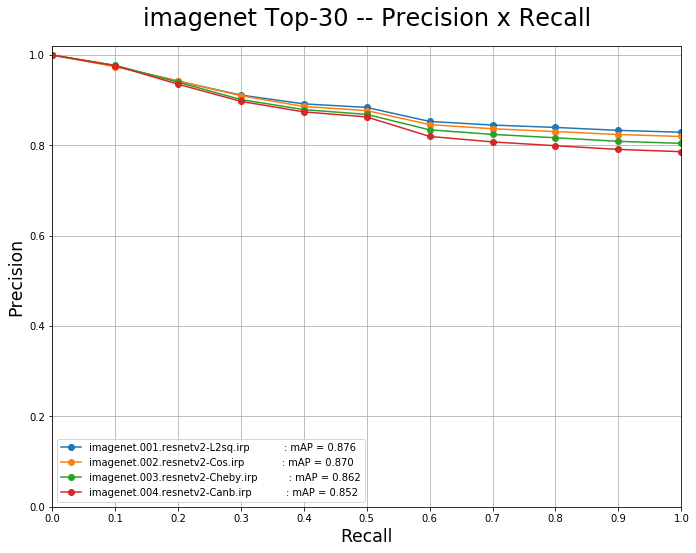

In [12]:
for n in namelist:
    print(n)

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
fig.tight_layout()

x = np.arange(0.0, 1.1, 0.1)
for i in range(len(namelist)):
    y = mean_elp_prec_list[i]
    l = namelist[i]
    
    ax.plot(x, y, '-o', label="{0:50s}".format(l))

ax.set_xlim(0.0, 1.0)
ax.set_xlabel('Recall', **dict(fontsize='xx-large'))
ax.set_xticks(np.arange(0.0, 1.1, 0.1))

ax.set_ylim(0.0, 1.02)
ax.set_ylabel('Precision', **dict(fontsize='xx-large'))

ax.set_title('{0:s} Top-{1:d} -- Precision x Recall'.format(collection, topk), **dict(fontsize=24), pad=20)
ax.grid(which='both', axis='both')

_ = ax.legend()

plt.subplots_adjust(left=0.1, top=0.9, bottom=0.1)
plt.savefig('/home/alberto/phD/projects/performance_prediction/ret-mr-learning/misc./{0:s}_top{1:d}_PxR.svg'.format(collection, topk))